In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. Sociodemographic Clustering')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. Sociodemographic Clustering/Output')
cur_date = "033123"

library(readxl)
library(tidyverse)
library(reshape2)
library(factoextra)

# reading in files
acs_df = data.frame(read_excel("Input/Imputed_ACS_Data_030923.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# viewing data
head(acs_df)

,GEO_ID,Census_Tract,County,Sex_Ratio,Median_Age,Population_Under_5,Population_Under_18,Population_Over_18,Population_Over_65,Race_White,⋯,Some_College,College_Education,Employed,Unemployed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work,Average_Income_Deficit
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,87.2,37.3,9.5,21.9,78.1,15.1,61.0,⋯,21.1,0.9,91.61621,8.383791,94.24951,89.20607,43.04307,21.93988,35.01704,5016
2,14000US37001020200,202.00,Alamance,78.3,31.0,7.1,29.1,70.9,11.2,51.9,⋯,18.9,12.4,89.54774,10.452261,86.97436,92.01970,39.42970,23.56604,37.00426,4007
3,14000US37001020300,203.00,Alamance,77.8,40.7,7.3,27.1,72.9,18.9,45.2,⋯,22.6,4.6,93.78094,6.219059,92.69841,94.80990,41.09615,18.98616,39.91770,5370
4,14000US37001020400,204.00,Alamance,78.1,30.5,8.9,31.4,68.6,10.1,19.6,⋯,16.3,5.4,91.69985,8.300153,93.36493,90.64532,37.55153,28.40066,34.04782,7148
5,14000US37001020501,205.01,Alamance,92.7,35.1,5.5,23.3,76.7,15.6,76.1,⋯,3.5,1.5,91.14707,8.852927,96.10136,86.41860,45.86115,25.56742,28.57143,7403
6,14000US37001020502,205.02,Alamance,99.0,32.1,9.8,30.0,70.0,8.9,40.7,⋯,10.8,5.2,89.44282,10.557185,89.64942,89.15094,43.57167,22.82645,33.60188,5412


Using k-means clustering to how GEO IDs cluster based on data from 8 EJ Screen indicators and housing data, seprately. This will be done to prioritize regions of concern in NC based on a higher level of social stressors. 
[source](https://www.epa.gov/ejscreen/overview-socioeconomic-indicators-ejscreen)

In [3]:
# selecting variables we're interested in
ejscreen_indicators = c("Population_Over_65", "Race_Non_White", "Hispanic_Latino", "Population_Under_5",
                          "Non_Proficient_English_Speakers", "Poverty_Overall", "Less_than_High_School", "Unemployed")

# changing the df from a wide to long format 
longer_acs_df = pivot_longer(acs_df, cols = 4:45, names_to = "Variables", values_to = "Value") %>%
    filter(Variables %in% ejscreen_indicators)

head(longer_acs_df)

GEO_ID,Census_Tract,County,Variables,Value
<chr>,<dbl>,<chr>,<chr>,<dbl>
14000US37001020100,201,Alamance,Population_Under_5,9.5
14000US37001020100,201,Alamance,Population_Over_65,15.1
14000US37001020100,201,Alamance,Race_Non_White,39.0
14000US37001020100,201,Alamance,Hispanic_Latino,9.5
14000US37001020100,201,Alamance,Non_Proficient_English_Speakers,3.9
14000US37001020100,201,Alamance,Poverty_Overall,27.2


In [4]:
# wide formatted df w/ ej screen or housing variables and corresponding geo ids
id_ejscreen_df = reshape2::dcast(longer_acs_df, GEO_ID ~ Variables, value.var = "Value") %>% 
    column_to_rownames("GEO_ID") %>%
    # standardizing data
    scale()

head(id_ejscreen_df)

,Hispanic_Latino,Less_than_High_School,Non_Proficient_English_Speakers,Population_Over_65,Population_Under_5,Poverty_Overall,Race_Non_White,Unemployed
14000US37001020100,0.04751546,0.83450223,-0.09987681,-0.2083024,1.45505705,1.0741366,0.3315244,0.53139084
14000US37001020200,2.27313397,0.36826352,2.24810894,-0.7230370,0.52483792,1.6400109,0.7134367,0.98860576
14000US37001020300,4.12192818,0.63879709,2.88846869,0.2932339,0.60235618,0.7440433,1.0062360,0.05289817
14000US37001020400,1.40172778,0.75391776,1.10322333,-0.8682186,1.22250227,1.5079736,2.0925641,0.51290344
14000US37001020501,0.63630342,-1.15708537,1.06441365,-0.1423108,-0.09530817,-0.2085118,-0.3134829,0.63508871
14000US37001020502,1.69612176,0.02290151,1.70477340,-1.0265985,1.57133444,0.8100619,1.1929487,1.01179806


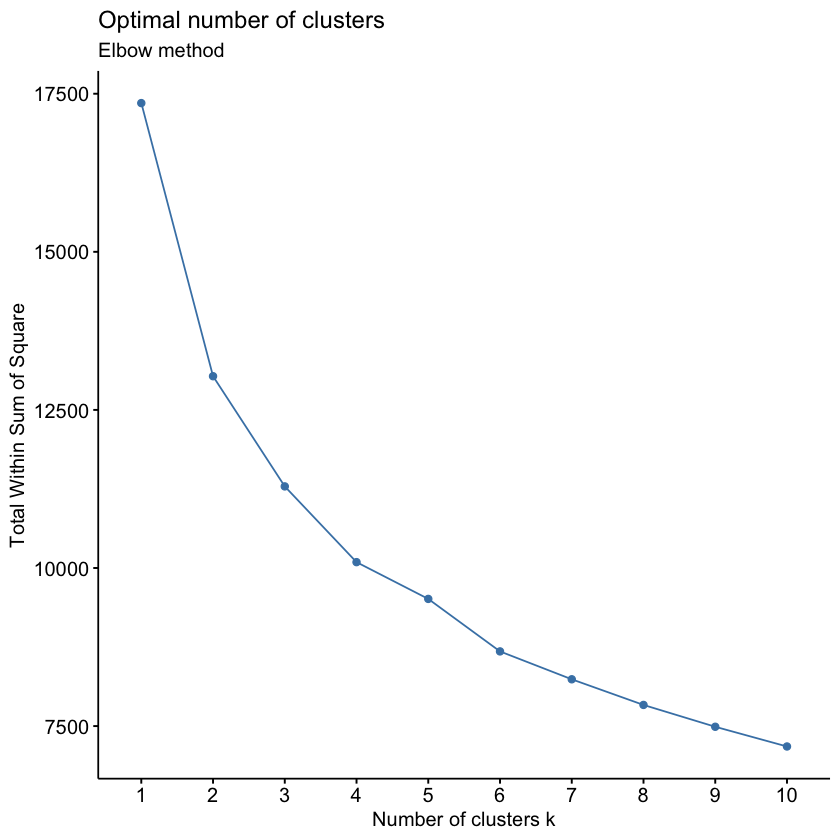

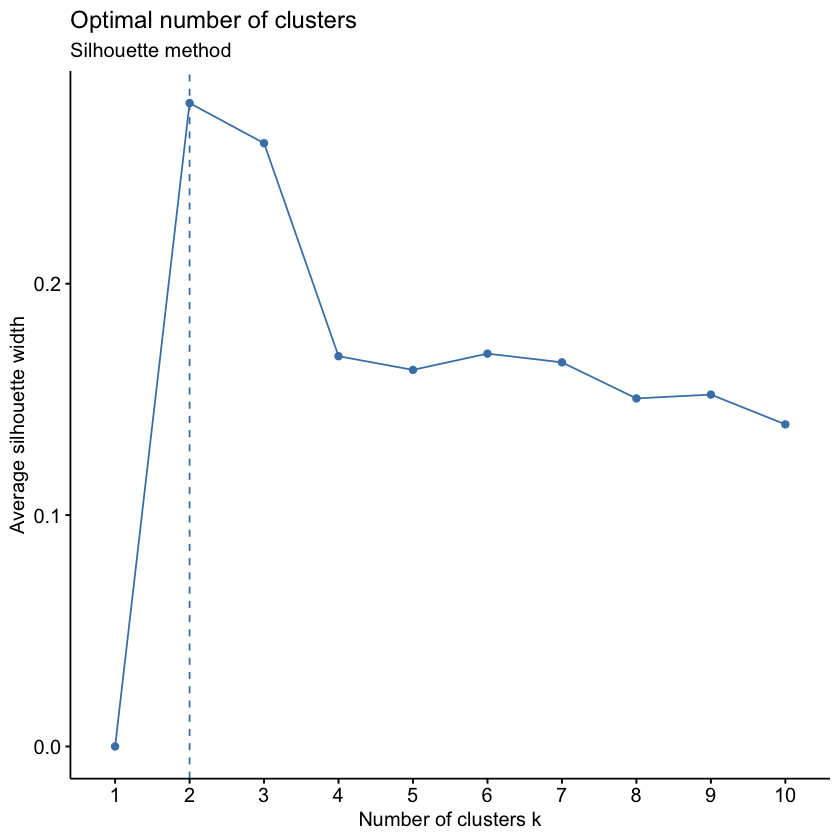

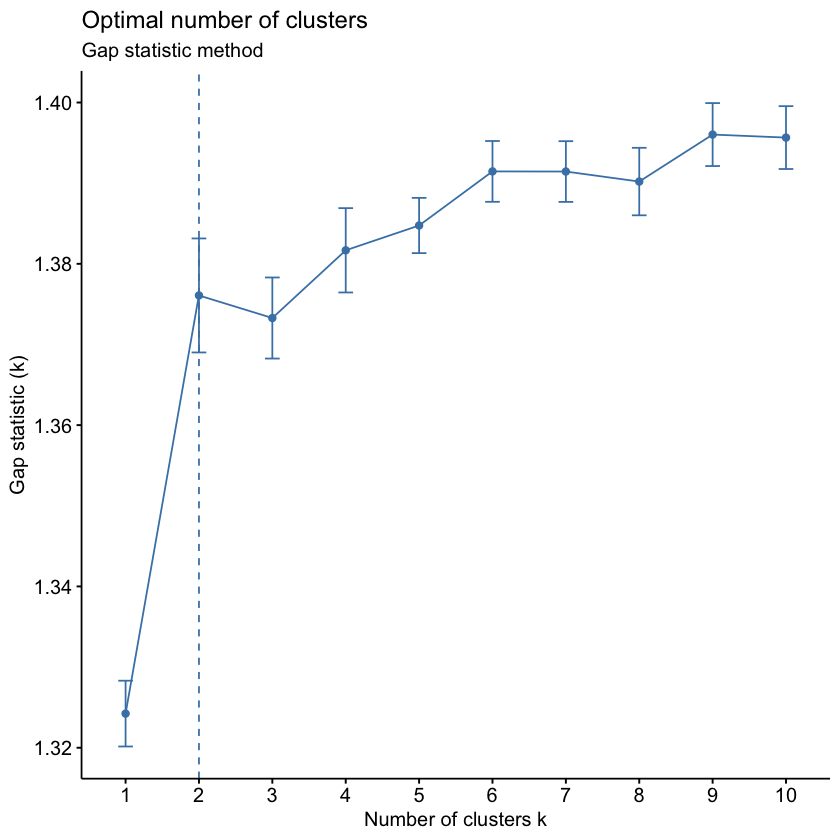

In [5]:
# determining optimal number of clusters using 3 different methods: wss, silhoutte, and gapstat
# ej screen
fviz_nbclust(id_ejscreen_df, kmeans, method = "wss") +
  labs(subtitle = "Elbow method") # suggests ??
fviz_nbclust(id_ejscreen_df, kmeans, method = "silhouette") + 
  labs(subtitle = "Silhouette method") # suggests 2
fviz_nbclust(id_ejscreen_df, kmeans, method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method") # suggests 2

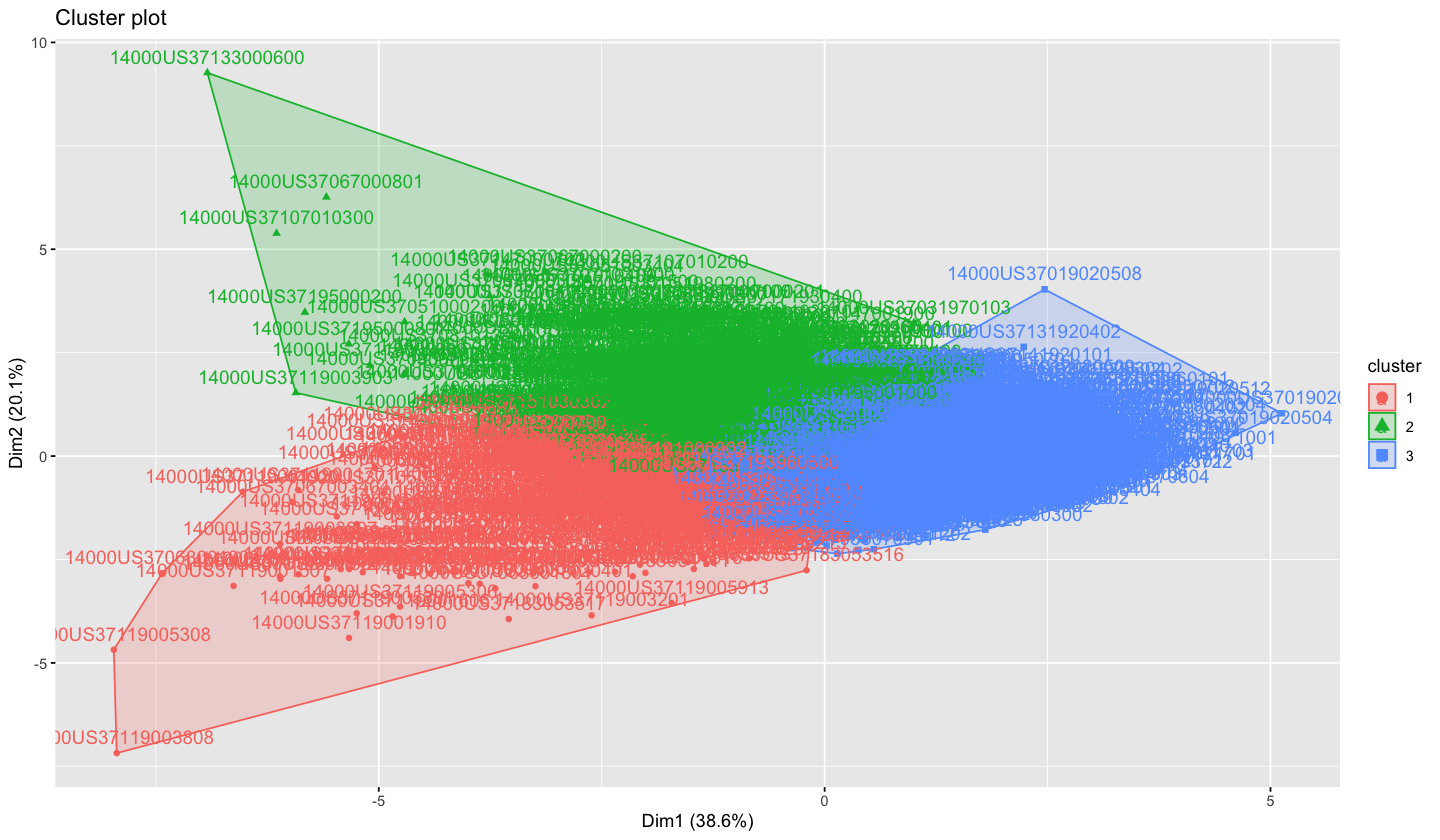

In [6]:
# ended up moving forward with 3 clusters to make mapping of high priority areas more distinct
# ejscreen
options(repr.plot.width=12, repr.plot.height=7) #changing size
ejscreen_kmeans_3 = kmeans(id_ejscreen_df, centers = 3, nstart = 25)
fviz_cluster(ejscreen_kmeans_3, data = id_ejscreen_df) 

PCA was only able to capture ~60% of data from the EJ screen indicators, however we're still able to see 3 distinct clusters.

In [7]:
# extracting geo id cluster assignments
ejscreen_cluster_df = data.frame(ejscreen_kmeans_3$cluster) %>%
    rownames_to_column(var = "GEO_ID")
colnames(ejscreen_cluster_df)[2] = c("Cluster")

head(ejscreen_cluster_df)

,GEO_ID,Cluster
,<chr>,<int>
1,14000US37001020100,2
2,14000US37001020200,1
3,14000US37001020300,1
4,14000US37001020400,1
5,14000US37001020501,3
6,14000US37001020502,1


In [8]:
# creating a df of scaled and unscaled data for export
ejscreen_cluster_df = inner_join(longer_acs_df %>%
    group_by(Variables) %>%
    mutate(Scaled_Value = scale(Value)), ejscreen_cluster_df)

head(ejscreen_cluster_df)

Joining, by = "GEO_ID"


GEO_ID,Census_Tract,County,Variables,Value,Scaled_Value,Cluster
<chr>,<dbl>,<chr>,<chr>,<dbl>,"<dbl[,1]>",<int>
14000US37001020100,201,Alamance,Population_Under_5,9.5,1.45505705,2
14000US37001020100,201,Alamance,Population_Over_65,15.1,-0.20830239,2
14000US37001020100,201,Alamance,Race_Non_White,39.0,0.33152444,2
14000US37001020100,201,Alamance,Hispanic_Latino,9.5,0.04751546,2
14000US37001020100,201,Alamance,Non_Proficient_English_Speakers,3.9,-0.09987681,2
14000US37001020100,201,Alamance,Poverty_Overall,27.2,1.07413661,2


In [9]:
# exporting data
write.csv(ejscreen_cluster_df, paste0(Output,"/", cur_date, "_GEO_ID_Sociodemographic_Clusters.csv"), row.names = FALSE)